# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# 3. Read the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
dataset.shape

(50, 5)

In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# 3. Missing Value Treatment

In [9]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# 4. Checking for unique values in categorical variable

In [10]:
dataset.select_dtypes(include = 'object').value_counts()

State     
California    17
New York      17
Florida       16
dtype: int64

# 5.Outlier treatment

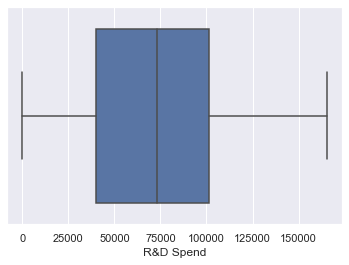

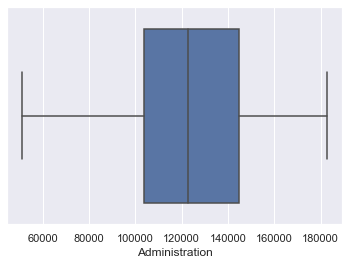

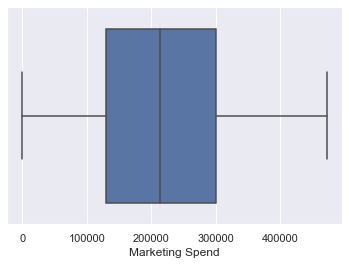

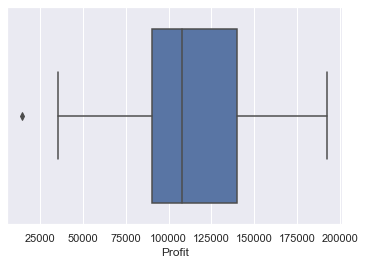

In [11]:
for i in list(dataset.select_dtypes(exclude='object')):
    sns.boxplot(dataset[i])
    plt.show()

In [51]:
# sorted(dataset['Profit'])
# q1,q3 = dataset['Profit'].quantile([0.25,0.75])
# iqr = q3-q1
# lrange = q1-1.5*iqr
# urange = q3+1.5*iqr
# dataset['Profit'] = np.where(dataset['Profit']<35000,35000,dataset['Profit'])

# 6. Describing Dataset and checking Duplicate values

In [12]:
dups = dataset.duplicated()
dups.sum()

0

# 7. Encoding Part

In [13]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
dataset1 = dataset.copy()# for EDA part

In [15]:
dataset = pd.get_dummies(dataset,columns=['State'],prefix=['State'],drop_first = True)

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [92]:
dataset2 = dataset1[dataset1.State.isin(['Florida'])]
dataset2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
7,130298.13,145530.06,323876.68,Florida,155752.60
10,101913.08,110594.11,229160.95,Florida,146121.95
12,93863.75,127320.38,249839.44,Florida,141585.52


# 9.Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x = dataset.drop(['Profit'],axis = 1)

In [19]:
y = dataset['Profit']

In [20]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [22]:
x_scaler = scaler.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.2,random_state = 101)

In [26]:
x_train

array([[ 9.44411957e-02,  9.11841968e-03,  4.40446224e-01,
        -6.85994341e-01, -7.17740563e-01],
       [ 7.31146008e-02, -7.95469167e-01, -5.81939297e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.45773797e+00, -7.17740563e-01],
       [-1.60035036e+00,  1.01253936e-01, -1.72739998e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 3.96724938e-01, -2.58465367e-01,  6.92992062e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -6.85994341e-01,  1.39326109e+00],
       [-1.00853372e+00, -1.32079581e+00, -3.84552407e-01,
         1.45773797e+00, -7.17740563e-01],
       [-2.58074369e-01, -2.05628659e-01, -9.90357166e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 5.57260867e-02, -2.69587651e-01,  7.23925995e-01,
        -6.85994341e-01

In [78]:
y_train

3     182901.99
41     77798.83
30     99937.59
15    129917.04
20    118474.03
43     69758.98
38     81229.06
44     65200.33
39     81005.76
10    146121.95
49     35000.00
25    107404.34
33     96778.92
36     90708.19
2     191050.39
27    105008.31
34     96712.80
35     96479.51
8     152211.77
19    122776.86
29    101004.64
12    141585.52
5     156991.12
0     192261.83
28    103282.38
4     166187.94
40     78239.91
13    134307.35
9     149759.96
48     35673.41
23    108733.99
6     156122.51
17    125370.37
11    144259.40
31     97483.56
Name: Profit, dtype: float64

# 11. EDA of dataset

In [39]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(dataset_final)
# report.to_file(output_file='50_startups.html')

<AxesSubplot:>

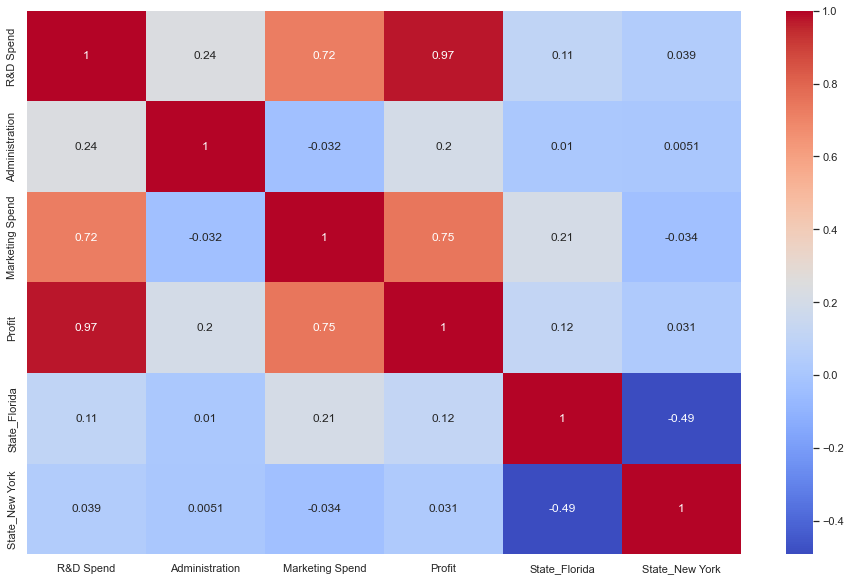

In [27]:
plt.figure(figsize = (16,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

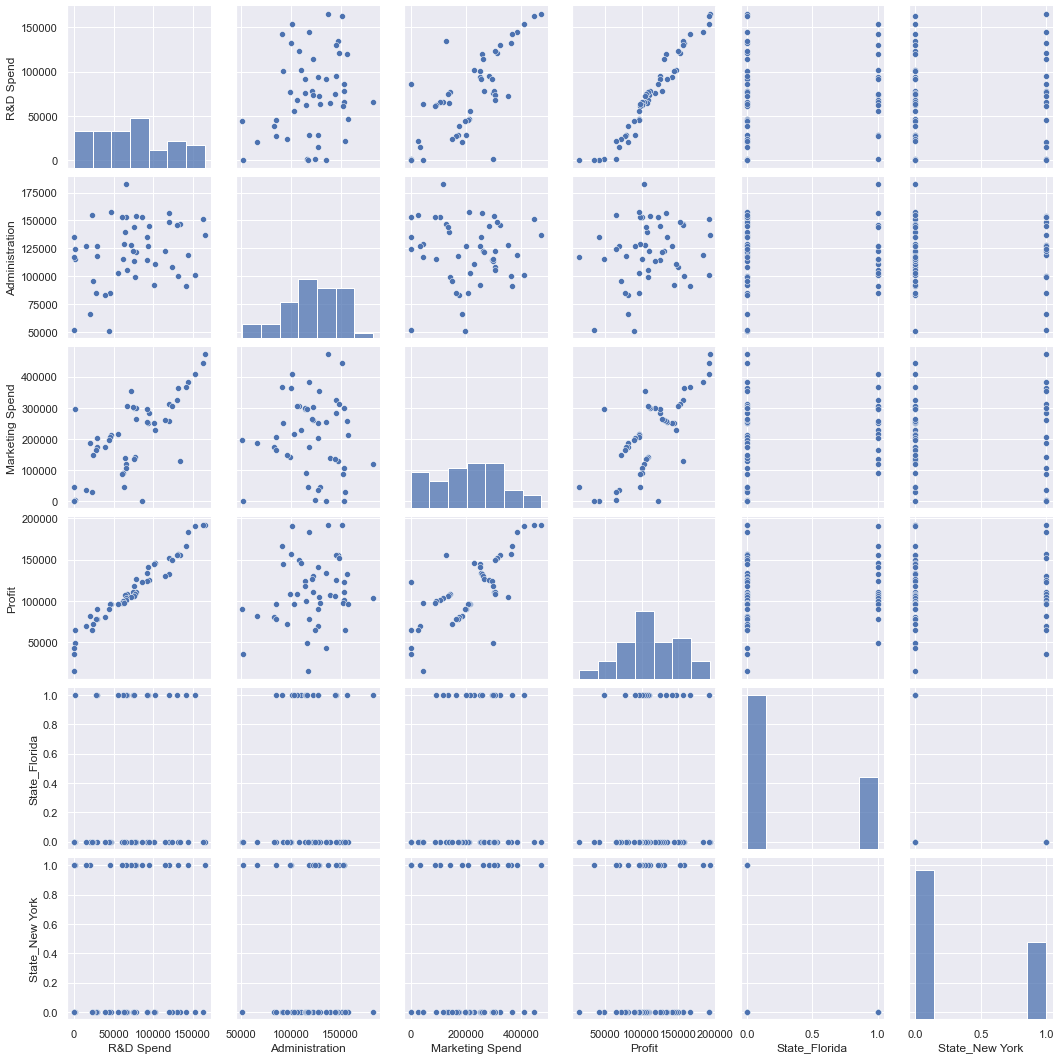

In [28]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

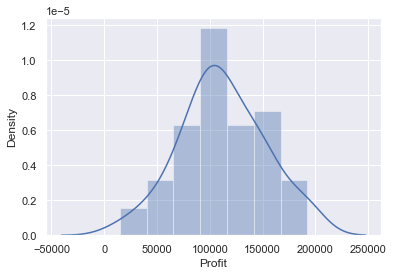

In [29]:
sns.distplot(dataset['Profit'])

In [36]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Text(0.5, 1.0, 'R&D Spend Vs Profit')

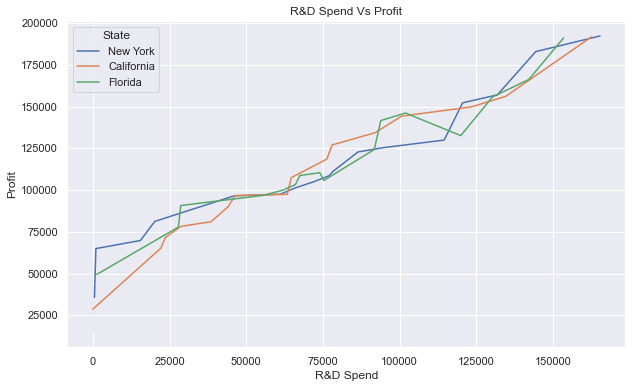

In [44]:
plt.figure(figsize= (10,6))
sns.lineplot(data = dataset1,x = 'R&D Spend',y = 'Profit',hue = 'State')
plt.title('R&D Spend Vs Profit')

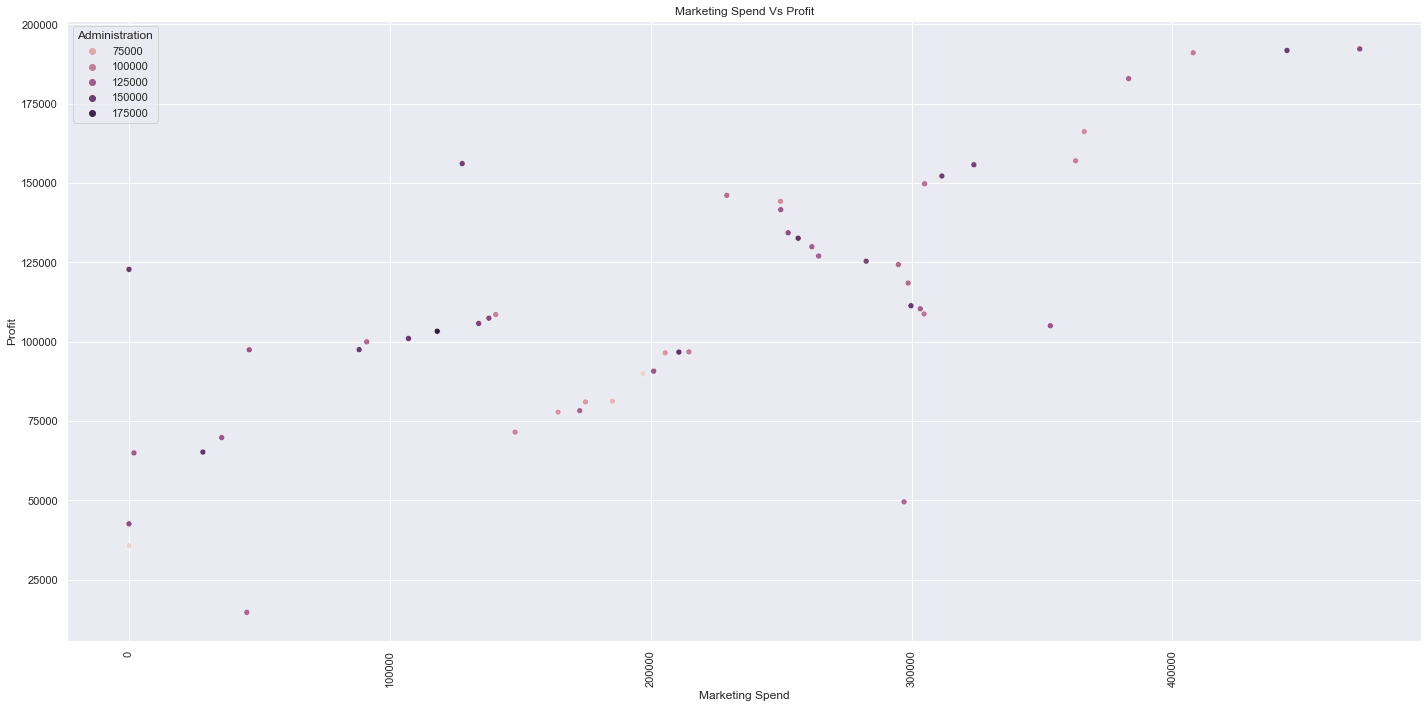

In [70]:
plt.figure(figsize= (20,10))
sns.scatterplot(data = dataset1,x = 'Marketing Spend',y = 'Profit',hue='Administration')
plt.title('Marketing Spend Vs Profit')
# sns.color_palette("pastel")
# plt.xlabel('Year')
# plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()

# checking vif

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['feature']= x.columns
vif

,VIF,feature
0,2.495511,R&D Spend
1,1.177766,Administration
2,2.416797,Marketing Spend
3,1.387641,State_Florida
4,1.335061,State_New York


# Linear model

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

In [32]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred_linear = linear.predict(x_test)
r2_score(y_test,y_pred_linear)

0.9493973303776393

# Applying Ridge, Lasso and ElasticNet

In [33]:
ridge = Ridge(alpha = 0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.9493973303776394

In [34]:
lasso = Lasso(alpha = 2200)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.9589266782296331

In [35]:
elastic = ElasticNet(alpha = 0)
elastic.fit(x_train,y_train)
y_pred_elastic = elastic.predict(x_test)
r2_score(y_test,y_pred_elastic)

0.9493973303776394